Assignment 10

Load a loan approved datasets. Load the dataset and display the first five rows. What are the main features of the dataset? Check for missing values. Which columns have missing data, if any? What are the distributions of numerical features like age, income, and credit score? Are there any categorical features? If so, encode them appropriately (e.g., one-hot encoding or label encoding). Normalize or scale the numerical features if required. Explain why this step might be important for a decision tree. Split the dataset into training and testing sets (e.g., 70%-30%). Explain why this step is necessary. Train a decision tree model using the dataset. Use loan status as the target variable. What are the key hyperparameters of a decision tree, and how do they influence the model? Evaluate the performance of the decision tree using metrics like accuracy, precision, recall, and F1-score. Plot the confusion matrix for the model. Interpret the results. Experiment with different tree depths. How does limiting the maximum depth of the tree impact the model's accuracy on the test set? What other hyperparameters can help reduce overfitting? Visualize the decision tree. Identify the root node, decision criteria, and leaf nodes. Describe how the tree splits the data at each level. Extract and plot the feature importance scores from the decision tree. Which features are most significant in determining loan status? 

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\loan_approval_dataset.csv")

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
df.columns=df.columns.str.strip()

[]

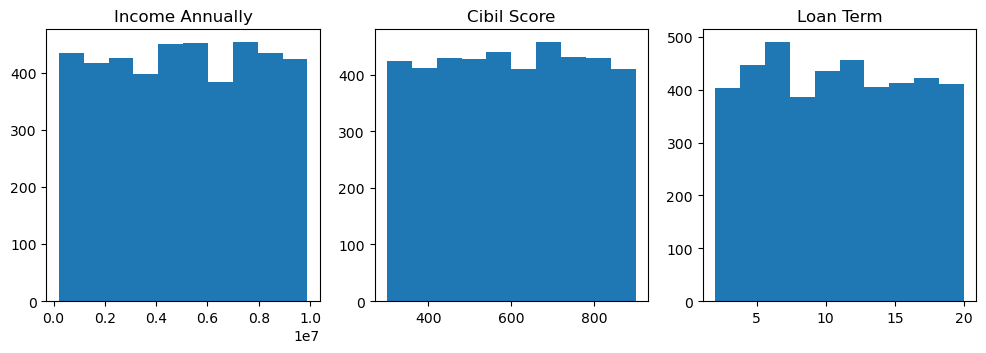

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.hist(df['income_annum'])
plt.title('Income Annually')
plt.subplot(3,3,2)
plt.hist(df['cibil_score'])
plt.title('Cibil Score')
plt.subplot(3,3,3)
plt.hist(df['loan_term'])
plt.title('Loan Term')
plt.plot()

In [12]:
l=[]
for i in df.columns:
    if df[i].dtype=='object':
        l.append(i)
l    

['education', 'self_employed', 'loan_status']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
for i in l:
    df[i]=le.fit_transform(df[i])

In [16]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


<Axes: >

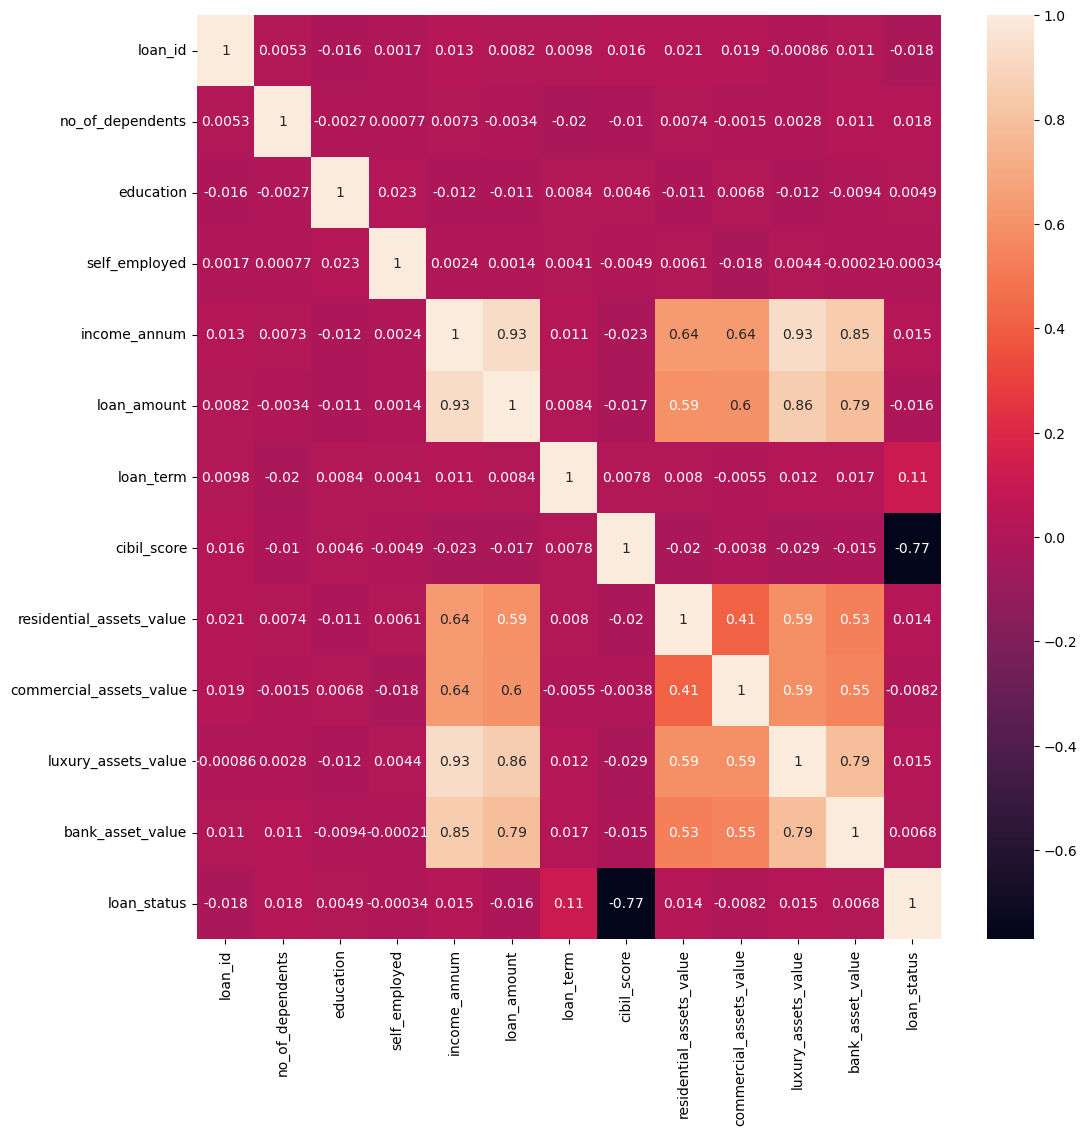

In [17]:
plt.figure(figsize=(12,12))
cr=df.corr(numeric_only=True)
sns.heatmap(cr,annot=True)

there is high correlation between bank asset valuea and income annum,loan amount and luxury assets,bank asset and loan amount,bank assets and luxury assets

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scale=StandardScaler()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [22]:
x.shape,y.shape

((4269, 11), (4269,))

In [23]:
x=scale.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2988, 11), (2988,), (1281, 11), (1281,))

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [28]:
hyp={
'criterion' : ["gini", "entropy", "log_loss"],
'min_sample_split' : [2,4,6,8,10],
'max_depth' : [None,3,5,10,15,20],
'min_samples_leaf' : [1,2,3,4]
}

In [29]:
d={'params':[],'accuracy_score':[]}

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
for i in range(len(hyp['criterion'])):
    for j in range(len(hyp['min_sample_split'])):
        for k in range(len(hyp['max_depth'])):
            for l in range(len(hyp['min_samples_leaf'])):
                d['params'].append(dict({'criterion':hyp['criterion'][i],
                                         'min_samples_split':hyp['min_sample_split'][j],
                                         'max_depth':hyp['max_depth'][k],
                                         'min_samples_leaf':hyp['min_samples_leaf'][l]}))
                dt=DecisionTreeClassifier(criterion=hyp['criterion'][i],
                                         min_samples_split=hyp['min_sample_split'][j],
                                        max_depth=hyp['max_depth'][k],
                                        min_samples_leaf=hyp['min_samples_leaf'][l])
                dt.fit(x_train,y_train)
                y_pred=dt.predict(x_test)
                d['accuracy_score'].append(accuracy_score(y_test,y_pred))         

In [32]:
h_acc=0
parameters={'params':[]}
for i in range(len(d['params'])):
    if h_acc<d['accuracy_score'][i]:
        h_acc=d['accuracy_score'][i]
        parameters['params']=d['params'][i]
print(parameters,h_acc)        

{'params': {'criterion': 'entropy', 'min_samples_split': 2, 'max_depth': None, 'min_samples_leaf': 1}} 0.9820452771272443


In [33]:
dt=DecisionTreeClassifier(criterion ="entropy", min_samples_split= 8, max_depth= None, min_samples_leaf= 2)

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=8)

In [35]:
y_pred=dt.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.9781420765027322

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       805
           1       0.98      0.96      0.97       476

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



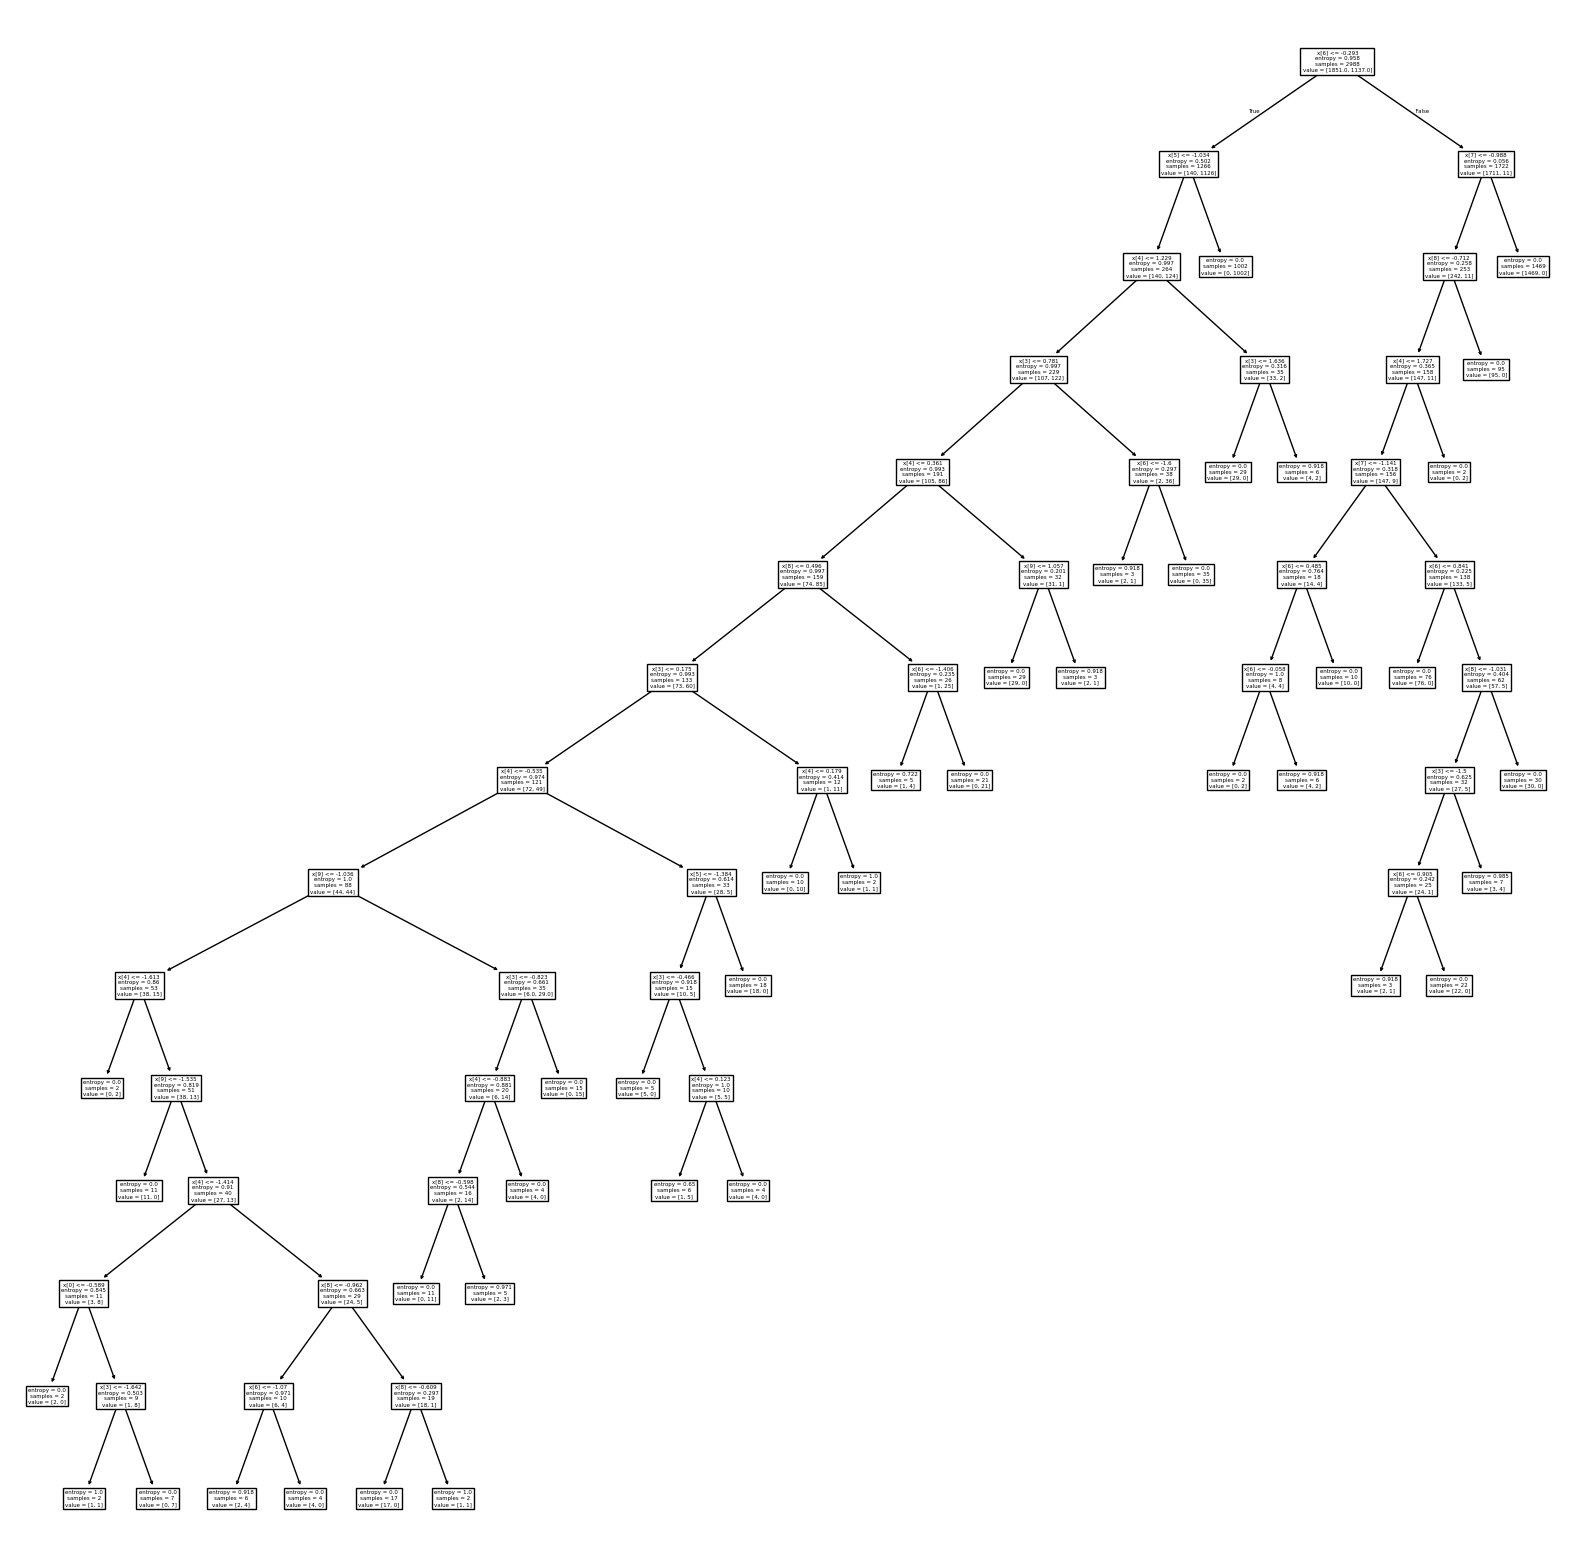

In [38]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt)
plt.show()

In [39]:
confusion_matrix(y_test,y_pred)

array([[794,  11],
       [ 17, 459]], dtype=int64)

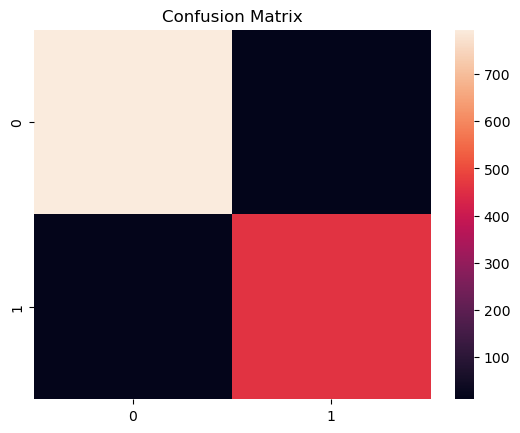

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred))
plt.title('Confusion Matrix')
plt.show()

In [41]:
feature_imp=dt.feature_importances_

In [42]:
feature_imp

array([0.00169513, 0.        , 0.        , 0.02170037, 0.03407711,
       0.13444963, 0.76957521, 0.01265487, 0.01577066, 0.01007702,
       0.        ])

In [88]:
cols=df.columns[1:-1]

In [90]:
cols

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [102]:
d={"feature":[],"feature_score":[]}
print("Important features :")
for i in range(len(feature_imp)):
    if feature_imp[i]>0:
        d["feature"].append(cols[i])
        d["feature_score"].append(feature_imp[i])
d

Important features :


{'feature': ['no_of_dependents',
  'income_annum',
  'loan_amount',
  'loan_term',
  'cibil_score',
  'residential_assets_value',
  'commercial_assets_value',
  'luxury_assets_value'],
 'feature_score': [0.0016951273449836075,
  0.02170036659015245,
  0.03407711420236108,
  0.13444962963484963,
  0.7695752143650061,
  0.012654870784948933,
  0.015770655414485572,
  0.010077021663212704]}

<BarContainer object of 8 artists>

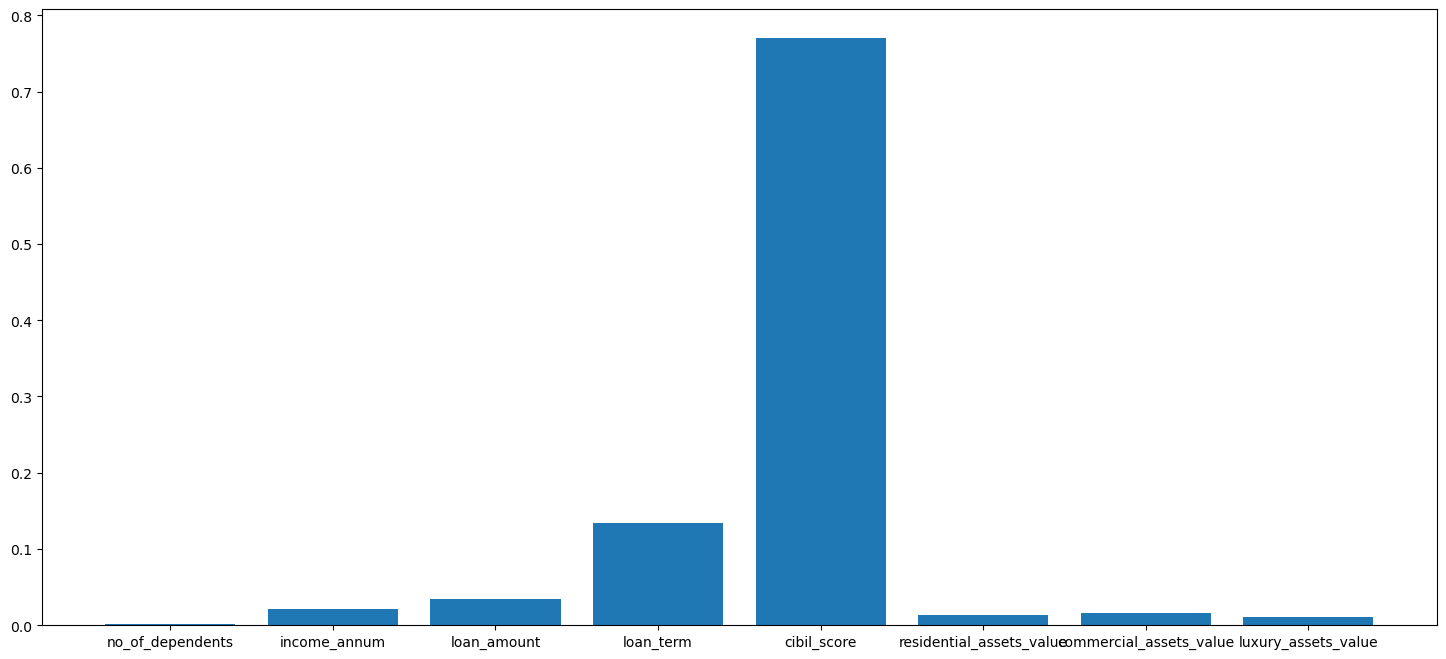

In [112]:
plt.figure(figsize=(18,8))
plt.bar(d['feature'],d['feature_score'])